# Perceptrón: Caso práctico II

## Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este ejercicio práctico vamos a utilizar el Perceptrón para solucionar un problema más complejo que el anterior. En este caso, nuestro objetivo será clasificar un conjunto de imágener en base al número que se muestra en las mismas.

## 1. Lectura del conjunto de datos

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [2]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
28*28

784

## 2. Visualización del conjunto de datos

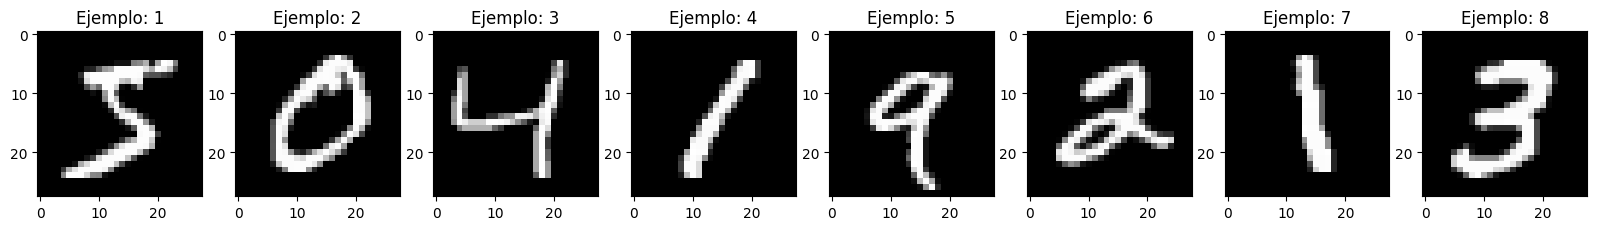

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#lo que hace es tomar cada pixel como caracteristica de entrada, en este caso son 784, y es de 70mil imagenes, y tienen tambien una etiqueta de
#a que numero perteneceb

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [5]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. División del conjunto de datos

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

## 4. Entrenamiento del algoritmo

In [15]:
from sklearn.linear_model import Perceptron

#en este caso se tienen 10 posibles clasificaciones, por lo que se requieren mas neuronas en la output layer y no solo una neurona
#como en la clasificacion binaria, en este caso 10 neuronas la output layer, por lo quqe tendra 10 funciones de agregacion y 10 funciones activacion
# y parametros asociados a cada una de las caracteristicas de entrada (las 784)

#los pesos en total son 784*10 +10 = 7850 pesos qe ajustar

#z1(x)=  x1*w1,1 + x2*w2,1 + ... + x784*w784,1 +b1 => hw(x) = heaviside(z1) = softmax(z1)
# ...
#z1(x)=  x1*w1,10 + x2*w2,10 + ... + x784*w784,10 +b1

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [16]:
# Número de parámetros que forman el modelo
clf.coef_.shape

(10, 784)

In [17]:
# Parámetros bias/intercept
clf.intercept_

array([ -1734.,   -508.,  -2564.,  -3946.,   -884.,   1260.,  -1856.,
         -161., -12007.,  -4204.])

## 5. Predicción con el conjunto de pruebas

In [18]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [19]:
len(y_test)

7000

In [21]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

#se usa la metrica f1_score, compara la metrica de presicion con la de exactitud, toma en cuenta los ++,+-,-+,-- 
f1_score(y_test, y_pred, average="weighted")

0.8590919949249973

## 6. Mostrando las imagenes mal clasificadas

In [23]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []
#compara las etiquetasmy visualiza las que estan mal etiquetadas
for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

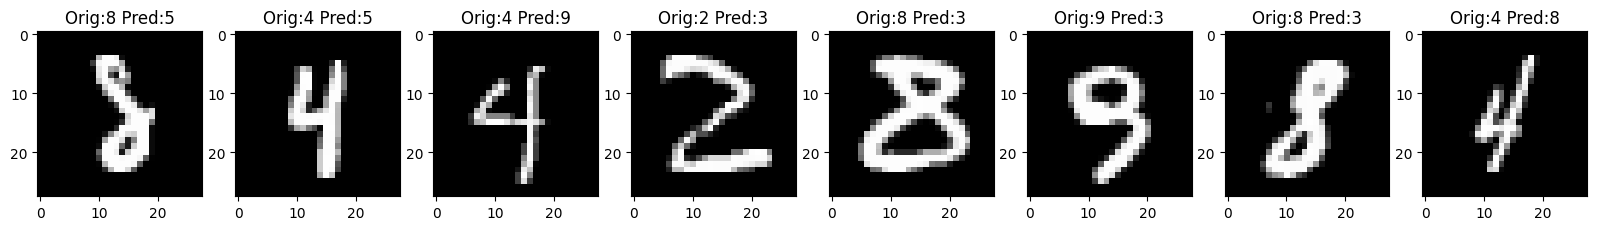

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()

#gran parte de los errores se debe a que se debe a que se esta utilizando un algoritmo con un limite de desicion lineal puede no ser lo optimo
#en este caso, a pesar de eso se obtiene una exactitud de 85